In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from PIL import Image
import pandas as pd
from tqdm import tqdm # For a nice progress bar

In [ ]:
# -- Hyperparameters --
LEARNING_RATE = 1e-3
BATCH_SIZE = 32 # Adjust based on your GPU memory
NUM_EPOCHS = 20

In [ ]:
# -- Device Setup --
# Check if a GPU is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
import zipfile
import os
import pandas as pd

def create_excel_from_zip(zip_path, excel_path):



    print(f"Processing ZIP file: {zip_path}...")

    # A list to store our file data (folder, path)
    image_data = []

    # Supported image extensions (you can add more if needed)
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    try:
        # Open the ZIP file for reading
        with zipfile.ZipFile(zip_path, 'r') as zf:
            # Get a list of all files in the zip archive
            file_list = zf.namelist()

            for file_path in file_list:
                # Check if the file has a valid image extension and is not a directory
                if file_path.lower().endswith(image_extensions) and not file_path.endswith('/'):

                    # os.path.dirname() is a neat way to get the folder path
                    folder_name = os.path.dirname(file_path)

                    # Add the data as a dictionary to our list
                    image_data.append({'Folder Name': folder_name, 'Image Path': file_path})



        # Create a pandas DataFrame from our list of data
        df = pd.DataFrame(image_data)

        # Save the DataFrame to an Excel file
        # The 'index=False' part prevents pandas from writing row numbers
        df.to_excel(excel_path, index=False)

        print(f"✅ Success! Excel file created at: {excel_path}")

    except zipfile.BadZipFile:
        print(f"❌ Error: The file '{zip_path}' is not a valid ZIP file or is corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# --- HOW TO USE THE SCRIPT ---

if __name__ == "__main__":
    # 1. Set the path to your ZIP file here
    input_zip_file = '/content/train.zip'  # <-- CHANGE THIS to your zip file's name/path

    # 2. Set the desired name for your output Excel file
    output_excel_file = 'train_paths_from_zip.xlsx' # <-- CHANGE THIS if you want a different name

    # 3. Run the function
    create_excel_from_zip(input_zip_file, output_excel_file)

Processing ZIP file: /content/train.zip...
✅ Success! Excel file created at: train_paths_from_zip.xlsx


In [ ]:
import pandas as pd
train_df = pd.read_excel('/content/train_paths_from_zip.xlsx')
train_df.tail()

,Folder Name,Image Path
2162,train/Striped Keelback-0,train/Striped Keelback-0/KEELBACK (80).jpg
2163,train/Striped Keelback-0,train/Striped Keelback-0/KEELBACK (83).jpg
2164,train/Striped Keelback-0,train/Striped Keelback-0/KEELBACK (84).jpg
2165,train/Striped Keelback-0,train/Striped Keelback-0/KEELBACK (89).jpg
2166,train/Striped Keelback-0,train/Striped Keelback-0/KEELBACK (91).jpg


In [ ]:
import zipfile
import os
import pandas as pd

def create_excel_from_zip(zip_path, excel_path):

    print(f"Processing ZIP file: {zip_path}...")

    # A list to store our file data (folder, path)
    image_data = []

    # Supported image extensions (you can add more if needed)
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')

    try:
        # Open the ZIP file for reading
        with zipfile.ZipFile(zip_path, 'r') as zf:
            # Get a list of all files in the zip archive
            file_list = zf.namelist()

            for file_path in file_list:
                # Check if the file has a valid image extension and is not a directory
                if file_path.lower().endswith(image_extensions) and not file_path.endswith('/'):

                    # os.path.dirname() is a neat way to get the folder path
                    folder_name = os.path.dirname(file_path)

                    # Add the data as a dictionary to our list
                    image_data.append({'Folder Name': folder_name, 'Image Path': file_path})



        # Create a pandas DataFrame from our list of data
        df = pd.DataFrame(image_data)

        # Save the DataFrame to an Excel file
        # The 'index=False' part prevents pandas from writing row numbers
        df.to_excel(excel_path, index=False)

        print(f"✅ Success! Excel file created at: {excel_path}")

    except zipfile.BadZipFile:
        print(f"❌ Error: The file '{zip_path}' is not a valid ZIP file or is corrupted.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


# --- HOW TO USE THE SCRIPT ---

if __name__ == "__main__":
    # 1. Set the path to your ZIP file here
    input_zip_file = '/content/Valid.zip'  # <-- CHANGE THIS to your zip file's name/path

    # 2. Set the desired name for your output Excel file
    output_excel_file = 'test_paths_from_zip.xlsx' # <-- CHANGE THIS if you want a different name

    # 3. Run the function
    create_excel_from_zip(input_zip_file, output_excel_file)

Processing ZIP file: /content/Valid.zip...
✅ Success! Excel file created at: test_paths_from_zip.xlsx


In [ ]:
test_df = pd.read_excel('/content/test_paths_from_zip.xlsx')
test_df.tail()

,Folder Name,Image Path
318,Valid/Striped Keelback-0,Valid/Striped Keelback-0/images (71).jpeg
319,Valid/Striped Keelback-0,Valid/Striped Keelback-0/images (72).jpeg
320,Valid/Striped Keelback-0,Valid/Striped Keelback-0/images (73).jpeg
321,Valid/Striped Keelback-0,Valid/Striped Keelback-0/images (74).jpeg
322,Valid/Striped Keelback-0,Valid/Striped Keelback-0/images (75).jpeg


In [ ]:
!unzip /content/train.zip

Archive:  /content/train.zip
   creating: train/
   creating: train/135-Flying Snake-0/
  inflating: train/135-Flying Snake-0/014382733e014d94bfb0b9ec1b1ce673.jpg  
  inflating: train/135-Flying Snake-0/01496a5469c940f9b431ce734283b145.jpg  
  inflating: train/135-Flying Snake-0/02876b847bf8405492d84318c2b03ecb.jpg  
  inflating: train/135-Flying Snake-0/02f7255004ea4b8497647aacc3ff48ae.jpg  
  inflating: train/135-Flying Snake-0/046af58cd21841e389cdd7b4d7d92075.jpg  
  inflating: train/135-Flying Snake-0/061b0ace4d5448c7b58532858581a933.jpg  
  inflating: train/135-Flying Snake-0/077d016f0bed4de7831b471ece27b476.jpg  
  inflating: train/135-Flying Snake-0/07e2a210daa84cae8396a181305f0f4b.jpg  
  inflating: train/135-Flying Snake-0/0916c8e7cc5b44eb83f4276b3b7d29b3.jpg  
  inflating: train/135-Flying Snake-0/0bbadac3619e470fa55fc5f411c87eeb.jpg  
  inflating: train/135-Flying Snake-0/0be14a62e82c4e82b17d044cad4e5011.jpg  
  inflating: train/135-Flying Snake-0/11636edccb9241d9ae82da536c1

In [ ]:
!unzip /content/Valid.zip

Archive:  /content/Valid.zip
   creating: Valid/
   creating: Valid/135-Flying Snake-0/
  inflating: Valid/135-Flying Snake-0/00570641a55c456f9f7d808ebebfc01b.jpg  
  inflating: Valid/135-Flying Snake-0/027cd911075d4af1825445bd19e4a04a.jpg  
  inflating: Valid/135-Flying Snake-0/02ebcc81b31b4544bd323d434a485b15.jpg  
  inflating: Valid/135-Flying Snake-0/0565aeedc50a428795a3348df55f26ca.jpg  
  inflating: Valid/135-Flying Snake-0/0ad10771403345b084ac5a96c7ab3b7d.jpg  
  inflating: Valid/135-Flying Snake-0/28ba1ab3d8294b9b933fbf03224851f0.jpg  
  inflating: Valid/135-Flying Snake-0/340c02e294ee4be49e902f26bf1267ca.jpg  
  inflating: Valid/135-Flying Snake-0/3ee69affdadd43b693137f7b26ef6ac4.jpg  
  inflating: Valid/135-Flying Snake-0/64c6be43dfe847208cd92a0d387fb897.jpg  
  inflating: Valid/135-Flying Snake-0/6896d6cbff3f4f9abb2129b1fa6f7509.jpg  
  inflating: Valid/135-Flying Snake-0/7190d4fe4b1a4543b4a25a479dc17661.jpg  
  inflating: Valid/135-Flying Snake-0/856c158d7bad4092b457a0fedf6

In [ ]:
import pandas as pd

# Let's assume train_df and test_df are your loaded dataframes

# --- Data Cleaning Step ---

def clean_label(label_string):
    """
    Cleans a label like 'Valid/135-Flying Snake-0' to just 'Flying Snake'.
    It splits the string by '-' and rejoins the parts that are not numbers.
    """
    parts = label_string.split('-')
    # Filter out parts that are just numbers (like '135' and '0')
    name_parts = [part for part in parts if not part.isdigit()]
    # Join the remaining parts back together
    cleaned_name = '-'.join(name_parts)
    # Handle the 'Valid/' or 'Train/' prefix if it exists
    if '/' in cleaned_name:
        cleaned_name = cleaned_name.split('/')[-1]
    return cleaned_name

# Apply this cleaning function to the label column of BOTH dataframes
train_df['Folder Name'] = train_df['Folder Name'].apply(clean_label)
test_df['Folder Name'] = test_df['Folder Name'].apply(clean_label)

# --- Verification ---
print("--- Cleaned train_df labels ---")
print(train_df['Folder Name'].unique())

print("\n--- Cleaned test_df labels ---")
print(test_df['Folder Name'].unique())

# The unique labels from both should now look consistent and clean.
# Now you can proceed with creating your SnakeDataset and DataLoaders as before.

--- Cleaned train_df labels ---
['135-Flying Snake' '203-Russell vipper'
 '215-Common Bronzeback Tree Snake' '25-Green Vine Snake' '368-Sea Krait'
 '462-Cobra' '497-King Cobra' '562-Fake Viper' '603-Python'
 '616-Red-necked Keelback' '758-Checkered Keelback'
 'INDIAN_BOA_NON-VENOUMOUS' 'Striped Keelback']

--- Cleaned test_df labels ---
['135-Flying Snake' '203-Russell vipper'
 '215-Common Bronzeback Tree Snake' '25-Green Vine Snake' '368-Sea Krait'
 '462-Cobra' '497-King Cobra' '562-Fake Viper' '603-Python'
 '616-Red-necked Keelback' '758-Checkered Keelback'
 'INDIAN_BOA_NON-VENOUMOUS' 'Striped Keelback']


In [ ]:
# --- NEW Data Cleaning Step ---

def clean_label(label_string):
    """
    Cleans labels like '758-Checkered Keelback' or 'Valid/135-Flying-Snake-0'
    to just the species name, e.g., 'Checkered Keelback' or 'Flying-Snake'.
    """
    # First, handle the 'Valid/' or 'Train/' prefix if it exists
    if '/' in label_string:
        label_string = label_string.split('/')[-1]

    # Split by the first hyphen. The species name will be the second part.
    # e.g., '758-Checkered Keelback' splits into ['758', 'Checkered Keelback']
    parts = label_string.split('-', 1)

    # If the split results in more than one part and the first part is a number,
    # then the species name is the second part.
    if len(parts) > 1 and parts[0].isdigit():
        return parts[1]
    else:
        # Otherwise, the original string (without the prefix) was the name.
        return label_string

# Apply this NEW cleaning function to the label column of BOTH dataframes
train_df['Folder Name'] = train_df['Folder Name'].apply(clean_label)
test_df['Folder Name'] = test_df['Folder Name'].apply(clean_label)


# --- Verification ---
print("--- Cleaned train_df labels (New Method) ---")
print(train_df['Folder Name'].unique())

print("\n--- Cleaned test_df labels (New Method) ---")
print(test_df['Folder Name'].unique())

--- Cleaned train_df labels (New Method) ---
['Flying Snake' 'Russell vipper' 'Common Bronzeback Tree Snake'
 'Green Vine Snake' 'Sea Krait' 'Cobra' 'King Cobra' 'Fake Viper' 'Python'
 'Red-necked Keelback' 'Checkered Keelback' 'INDIAN_BOA_NON-VENOUMOUS'
 'Striped Keelback']

--- Cleaned test_df labels (New Method) ---
['Flying Snake' 'Russell vipper' 'Common Bronzeback Tree Snake'
 'Green Vine Snake' 'Sea Krait' 'Cobra' 'King Cobra' 'Fake Viper' 'Python'
 'Red-necked Keelback' 'Checkered Keelback' 'INDIAN_BOA_NON-VENOUMOUS'
 'Striped Keelback']


In [ ]:
train_df.head()





,Folder Name,Image Path
0,Flying Snake,train/135-Flying Snake-0/014382733e014d94bfb0b...
1,Flying Snake,train/135-Flying Snake-0/01496a5469c940f9b431c...
2,Flying Snake,train/135-Flying Snake-0/02876b847bf8405492d84...
3,Flying Snake,train/135-Flying Snake-0/02f7255004ea4b8497647...
4,Flying Snake,train/135-Flying Snake-0/046af58cd21841e389cdd...


In [ ]:
class SnakeDataset(Dataset):
    def __init__(self, dataframe, transform=None, class_to_idx=None):
        self.df = dataframe
        self.transform = transform

        # Create or reuse the mapping from class name to integer index
        if class_to_idx is None:
            self.classes = sorted(self.df['Folder Name'].unique())
            self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        else:
            self.class_to_idx = class_to_idx
            self.classes = list(class_to_idx.keys())

        self.num_classes = len(self.classes)

    def __len__(self):
        # Returns the total number of samples in the dataset
        return len(self.df)

    def __getitem__(self, idx):
        # Gets a single sample from the dataset
        img_path = self.df.iloc[idx]['Image Path']
        label_name = self.df.iloc[idx]['Folder Name']

        # Open image using PIL
        image = Image.open(img_path).convert("RGB")

        # Get the integer label for the class name
        label = self.class_to_idx[label_name]

        # Apply transformations (data augmentation)
        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
# 3. Data Augmentation and Transformations
# This is the PyTorch equivalent of ImageDataGenerator's parameters
# ==============================================================================

# Normalization values are standard for models pre-trained on ImageNet
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

# Transformations for the training set (with augmentation)
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    # Add Color Jitter to change brightness, contrast, and saturation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    normalize,
])

# Transformations for the validation set (NO augmentation)
val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])



In [ ]:

# ==============================================================================

# Create the training dataset. This will also create the class mapping.
train_dataset = SnakeDataset(dataframe=train_df, transform=train_transforms)
print(f"Found {train_dataset.num_classes} classes in the training data.")

# Create the validation dataset, passing the mapping from the training set to ensure consistency.
val_dataset = SnakeDataset(dataframe=test_df, transform=val_transforms, class_to_idx=train_dataset.class_to_idx)

# DataLoaders handle batching and shuffling
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

Found 13 classes in the training data.


In [ ]:
 #5. Model Definition
# ==============================================================================

# Load the pre-trained ResNet50V2 model
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

# Freeze all layers in the base model (for Stage 1 of fine-tuning)
for param in model.parameters():
    param.requires_grad = False

# Get the number of input features for the classifier
num_ftrs = model.fc.in_features

# Replace the final layer (the classifier) with a new one for our number of classes
model.fc = nn.Linear(num_ftrs, train_dataset.num_classes)

# Move the model to the GPU
model = model.to(device)

In [ ]:
# ==============================================================================
# 6. Loss Function, Optimizer, and Scheduler
# ==============================================================================

criterion = nn.CrossEntropyLoss()

# We only want to train the parameters of the new final layer (model.fc)
optimizer = optim.Adam(model.fc.parameters(), lr=LEARNING_RATE)

# The PyTorch equivalent of ReduceLROnPlateau
# REMOVED the 'verbose=True' argument to fix the error
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.1,
    patience=3
)

In [ ]:
for epoch in range(NUM_EPOCHS):

    # --- Training Phase ---
    model.train()  # Set the model to training mode
    running_loss = 0.0
    train_corrects = 0

    # Use tqdm for a progress bar over the training data
    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Train]"):
        # Move data to the device (GPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        # Statistics
        running_loss += loss.item() * inputs.size(0)
        train_corrects += torch.sum(preds == labels.data)

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = train_corrects.double() / len(train_loader.dataset)

    # --- Validation Phase ---
    model.eval()   # Set the model to evaluation mode
    running_loss = 0.0
    val_corrects = 0

    # Disable gradient calculation for validation to save memory and speed up
    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{NUM_EPOCHS} [Val]"):
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)

    val_loss = running_loss / len(val_loader.dataset)
    val_acc = val_corrects.double() / len(val_loader.dataset)

    print(f"Epoch {epoch+1}/{NUM_EPOCHS} -> Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Step the learning rate scheduler based on validation loss
    scheduler.step(val_loss)

print("\n--- Training Complete ---")

# You can now save the model with:
# torch.save(model.state_dict(), 'resnet50_snake_classifier.pth')

Epoch 1/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.06it/s]


Epoch 1/20 -> Train Loss: 2.0458, Train Acc: 0.4172 | Val Loss: 1.6488, Val Acc: 0.6223


Epoch 2/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.88it/s]


Epoch 2/20 -> Train Loss: 1.4712, Train Acc: 0.6198 | Val Loss: 1.2369, Val Acc: 0.7183


Epoch 3/20 [Val]: 100%|██████████| 11/11 [00:02<00:00,  4.19it/s]


Epoch 3/20 -> Train Loss: 1.2237, Train Acc: 0.6779 | Val Loss: 1.1099, Val Acc: 0.6966


Epoch 4/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.82it/s]


Epoch 4/20 -> Train Loss: 1.1017, Train Acc: 0.6880 | Val Loss: 0.9947, Val Acc: 0.7214


Epoch 5/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.88it/s]


Epoch 5/20 -> Train Loss: 1.0085, Train Acc: 0.7227 | Val Loss: 0.9207, Val Acc: 0.7523


Epoch 6/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.88it/s]


Epoch 6/20 -> Train Loss: 0.9385, Train Acc: 0.7356 | Val Loss: 0.8868, Val Acc: 0.7585


Epoch 7/20 [Val]: 100%|██████████| 11/11 [00:02<00:00,  5.05it/s]


Epoch 7/20 -> Train Loss: 0.8854, Train Acc: 0.7577 | Val Loss: 0.8483, Val Acc: 0.7678


Epoch 8/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.92it/s]


Epoch 8/20 -> Train Loss: 0.8483, Train Acc: 0.7554 | Val Loss: 0.8358, Val Acc: 0.7647


Epoch 9/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.13it/s]


Epoch 9/20 -> Train Loss: 0.8053, Train Acc: 0.7628 | Val Loss: 0.8043, Val Acc: 0.7709


Epoch 10/20 [Val]: 100%|██████████| 11/11 [00:02<00:00,  5.45it/s]


Epoch 10/20 -> Train Loss: 0.7534, Train Acc: 0.7896 | Val Loss: 0.7720, Val Acc: 0.7802


Epoch 11/20 [Val]: 100%|██████████| 11/11 [00:02<00:00,  4.94it/s]


Epoch 11/20 -> Train Loss: 0.7602, Train Acc: 0.7707 | Val Loss: 0.7550, Val Acc: 0.7709


Epoch 12/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.02it/s]


Epoch 12/20 -> Train Loss: 0.7215, Train Acc: 0.7873 | Val Loss: 0.7498, Val Acc: 0.7771


Epoch 13/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.87it/s]


Epoch 13/20 -> Train Loss: 0.7317, Train Acc: 0.7780 | Val Loss: 0.7231, Val Acc: 0.7802


Epoch 14/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.94it/s]


Epoch 14/20 -> Train Loss: 0.6783, Train Acc: 0.8126 | Val Loss: 0.7168, Val Acc: 0.7926


Epoch 15/20 [Val]: 100%|██████████| 11/11 [00:02<00:00,  4.27it/s]


Epoch 15/20 -> Train Loss: 0.6757, Train Acc: 0.8062 | Val Loss: 0.6829, Val Acc: 0.7957


Epoch 16/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.89it/s]


Epoch 16/20 -> Train Loss: 0.6647, Train Acc: 0.7993 | Val Loss: 0.6883, Val Acc: 0.7895


Epoch 17/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.76it/s]


Epoch 17/20 -> Train Loss: 0.6294, Train Acc: 0.8210 | Val Loss: 0.6773, Val Acc: 0.8080


Epoch 18/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.96it/s]


Epoch 18/20 -> Train Loss: 0.6222, Train Acc: 0.8163 | Val Loss: 0.6806, Val Acc: 0.7988


Epoch 19/20 [Val]: 100%|██████████| 11/11 [00:02<00:00,  4.41it/s]


Epoch 19/20 -> Train Loss: 0.6116, Train Acc: 0.8145 | Val Loss: 0.6769, Val Acc: 0.7926


Epoch 20/20 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.06it/s]

Epoch 20/20 -> Train Loss: 0.6032, Train Acc: 0.8246 | Val Loss: 0.6808, Val Acc: 0.7833

--- Training Complete ---


In [ ]:
# ==============================================================================
# 8. STAGE 2: Fine-Tuning the Full Model
# ==============================================================================
print("\n--- Starting Stage 2: Fine-Tuning ---")

# -- Unfreeze all layers --
for param in model.parameters():
    param.requires_grad = True

# -- Create a new optimizer for all parameters with a very low learning rate --
optimizer = optim.Adam(model.parameters(), lr=1e-5) # CRITICAL: Very low LR

# -- Re-initialize the scheduler with the new optimizer --
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)

# -- Set the number of epochs for fine-tuning --
NUM_EPOCHS_STAGE_2 = 35 # Or however many you'd like

# -- Run the training and validation loop again --
for epoch in range(NUM_EPOCHS_STAGE_2):

    # --- Training Phase ---
    model.train()
    running_loss = 0.0
    train_corrects = 0
    for inputs, labels in tqdm(train_loader, desc=f"Stage 2 - Epoch {epoch+1}/{NUM_EPOCHS_STAGE_2} [Train]"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        train_corrects += torch.sum(preds == labels.data)

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = train_corrects.double() / len(train_loader.dataset)

    # --- Validation Phase ---
    model.eval()
    running_loss = 0.0
    val_corrects = 0
    with torch.no_grad():
        for inputs, labels in tqdm(val_loader, desc=f"Stage 2 - Epoch {epoch+1}/{NUM_EPOCHS_STAGE_2} [Val]"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)

    val_loss = running_loss / len(val_loader.dataset)
    val_acc = val_corrects.double() / len(val_loader.dataset)

    print(f"Stage 2 - Epoch {epoch+1}/{NUM_EPOCHS_STAGE_2} -> Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    scheduler.step(val_loss)

print("\n--- Fine-Tuning Complete ---")


--- Starting Stage 2: Fine-Tuning ---


Stage 2 - Epoch 1/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.22it/s]


Stage 2 - Epoch 1/35 -> Train Loss: 0.6100, Train Acc: 0.8090 | Val Loss: 0.6214, Val Acc: 0.8050


Stage 2 - Epoch 2/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.07it/s]


Stage 2 - Epoch 2/35 -> Train Loss: 0.5100, Train Acc: 0.8533 | Val Loss: 0.5847, Val Acc: 0.8235


Stage 2 - Epoch 3/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.95it/s]


Stage 2 - Epoch 3/35 -> Train Loss: 0.4739, Train Acc: 0.8408 | Val Loss: 0.5613, Val Acc: 0.8328


Stage 2 - Epoch 4/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.09it/s]


Stage 2 - Epoch 4/35 -> Train Loss: 0.4641, Train Acc: 0.8445 | Val Loss: 0.5465, Val Acc: 0.8390


Stage 2 - Epoch 5/35 [Val]: 100%|██████████| 11/11 [00:02<00:00,  3.85it/s]


Stage 2 - Epoch 5/35 -> Train Loss: 0.4384, Train Acc: 0.8611 | Val Loss: 0.5370, Val Acc: 0.8514


Stage 2 - Epoch 6/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.83it/s]


Stage 2 - Epoch 6/35 -> Train Loss: 0.4509, Train Acc: 0.8662 | Val Loss: 0.5221, Val Acc: 0.8545


Stage 2 - Epoch 7/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.98it/s]


Stage 2 - Epoch 7/35 -> Train Loss: 0.4127, Train Acc: 0.8657 | Val Loss: 0.5195, Val Acc: 0.8452


Stage 2 - Epoch 8/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.83it/s]


Stage 2 - Epoch 8/35 -> Train Loss: 0.3933, Train Acc: 0.8745 | Val Loss: 0.5180, Val Acc: 0.8390


Stage 2 - Epoch 9/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.72it/s]


Stage 2 - Epoch 9/35 -> Train Loss: 0.3606, Train Acc: 0.8819 | Val Loss: 0.5211, Val Acc: 0.8483


Stage 2 - Epoch 10/35 [Val]: 100%|██████████| 11/11 [00:02<00:00,  4.01it/s]


Stage 2 - Epoch 10/35 -> Train Loss: 0.3570, Train Acc: 0.8823 | Val Loss: 0.5147, Val Acc: 0.8514


Stage 2 - Epoch 11/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.87it/s]


Stage 2 - Epoch 11/35 -> Train Loss: 0.3681, Train Acc: 0.8832 | Val Loss: 0.5028, Val Acc: 0.8545


Stage 2 - Epoch 12/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.03it/s]


Stage 2 - Epoch 12/35 -> Train Loss: 0.3584, Train Acc: 0.8851 | Val Loss: 0.4936, Val Acc: 0.8545


Stage 2 - Epoch 13/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.94it/s]


Stage 2 - Epoch 13/35 -> Train Loss: 0.3250, Train Acc: 0.8962 | Val Loss: 0.4840, Val Acc: 0.8545


Stage 2 - Epoch 14/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.11it/s]


Stage 2 - Epoch 14/35 -> Train Loss: 0.3234, Train Acc: 0.8971 | Val Loss: 0.4904, Val Acc: 0.8545


Stage 2 - Epoch 15/35 [Val]: 100%|██████████| 11/11 [00:02<00:00,  5.25it/s]


Stage 2 - Epoch 15/35 -> Train Loss: 0.2938, Train Acc: 0.9072 | Val Loss: 0.4844, Val Acc: 0.8545


Stage 2 - Epoch 16/35 [Val]: 100%|██████████| 11/11 [00:02<00:00,  4.66it/s]


Stage 2 - Epoch 16/35 -> Train Loss: 0.3036, Train Acc: 0.9068 | Val Loss: 0.4768, Val Acc: 0.8421


Stage 2 - Epoch 17/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.85it/s]


Stage 2 - Epoch 17/35 -> Train Loss: 0.2866, Train Acc: 0.9105 | Val Loss: 0.4810, Val Acc: 0.8638


Stage 2 - Epoch 18/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.10it/s]


Stage 2 - Epoch 18/35 -> Train Loss: 0.2854, Train Acc: 0.9059 | Val Loss: 0.4803, Val Acc: 0.8607


Stage 2 - Epoch 19/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.95it/s]


Stage 2 - Epoch 19/35 -> Train Loss: 0.2858, Train Acc: 0.9045 | Val Loss: 0.4580, Val Acc: 0.8762


Stage 2 - Epoch 20/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.95it/s]


Stage 2 - Epoch 20/35 -> Train Loss: 0.2684, Train Acc: 0.9072 | Val Loss: 0.4785, Val Acc: 0.8607


Stage 2 - Epoch 21/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.27it/s]


Stage 2 - Epoch 21/35 -> Train Loss: 0.2894, Train Acc: 0.9017 | Val Loss: 0.4575, Val Acc: 0.8638


Stage 2 - Epoch 22/35 [Val]: 100%|██████████| 11/11 [00:02<00:00,  3.93it/s]


Stage 2 - Epoch 22/35 -> Train Loss: 0.2471, Train Acc: 0.9192 | Val Loss: 0.4620, Val Acc: 0.8638


Stage 2 - Epoch 23/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.96it/s]


Stage 2 - Epoch 23/35 -> Train Loss: 0.2440, Train Acc: 0.9317 | Val Loss: 0.4665, Val Acc: 0.8576


Stage 2 - Epoch 24/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.11it/s]


Stage 2 - Epoch 24/35 -> Train Loss: 0.2447, Train Acc: 0.9179 | Val Loss: 0.4609, Val Acc: 0.8576


Stage 2 - Epoch 25/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.82it/s]


Stage 2 - Epoch 25/35 -> Train Loss: 0.2373, Train Acc: 0.9266 | Val Loss: 0.4554, Val Acc: 0.8638


Stage 2 - Epoch 26/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.89it/s]


Stage 2 - Epoch 26/35 -> Train Loss: 0.2316, Train Acc: 0.9252 | Val Loss: 0.4542, Val Acc: 0.8638


Stage 2 - Epoch 27/35 [Val]: 100%|██████████| 11/11 [00:02<00:00,  5.09it/s]


Stage 2 - Epoch 27/35 -> Train Loss: 0.2420, Train Acc: 0.9239 | Val Loss: 0.4506, Val Acc: 0.8576


Stage 2 - Epoch 28/35 [Val]: 100%|██████████| 11/11 [00:02<00:00,  4.44it/s]


Stage 2 - Epoch 28/35 -> Train Loss: 0.2226, Train Acc: 0.9345 | Val Loss: 0.4507, Val Acc: 0.8669


Stage 2 - Epoch 29/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.89it/s]


Stage 2 - Epoch 29/35 -> Train Loss: 0.2230, Train Acc: 0.9322 | Val Loss: 0.4595, Val Acc: 0.8576


Stage 2 - Epoch 30/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  6.07it/s]


Stage 2 - Epoch 30/35 -> Train Loss: 0.2257, Train Acc: 0.9285 | Val Loss: 0.4654, Val Acc: 0.8607


Stage 2 - Epoch 31/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.90it/s]


Stage 2 - Epoch 31/35 -> Train Loss: 0.2078, Train Acc: 0.9382 | Val Loss: 0.4539, Val Acc: 0.8700


Stage 2 - Epoch 32/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.93it/s]


Stage 2 - Epoch 32/35 -> Train Loss: 0.2170, Train Acc: 0.9345 | Val Loss: 0.4569, Val Acc: 0.8607


Stage 2 - Epoch 33/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.61it/s]


Stage 2 - Epoch 33/35 -> Train Loss: 0.2085, Train Acc: 0.9349 | Val Loss: 0.4512, Val Acc: 0.8669


Stage 2 - Epoch 34/35 [Val]: 100%|██████████| 11/11 [00:02<00:00,  4.38it/s]


Stage 2 - Epoch 34/35 -> Train Loss: 0.1867, Train Acc: 0.9414 | Val Loss: 0.4616, Val Acc: 0.8638


Stage 2 - Epoch 35/35 [Val]: 100%|██████████| 11/11 [00:01<00:00,  5.97it/s]

Stage 2 - Epoch 35/35 -> Train Loss: 0.2004, Train Acc: 0.9395 | Val Loss: 0.4541, Val Acc: 0.8638

--- Fine-Tuning Complete ---


Generating Predictions: 100%|██████████| 11/11 [00:01<00:00,  5.80it/s]


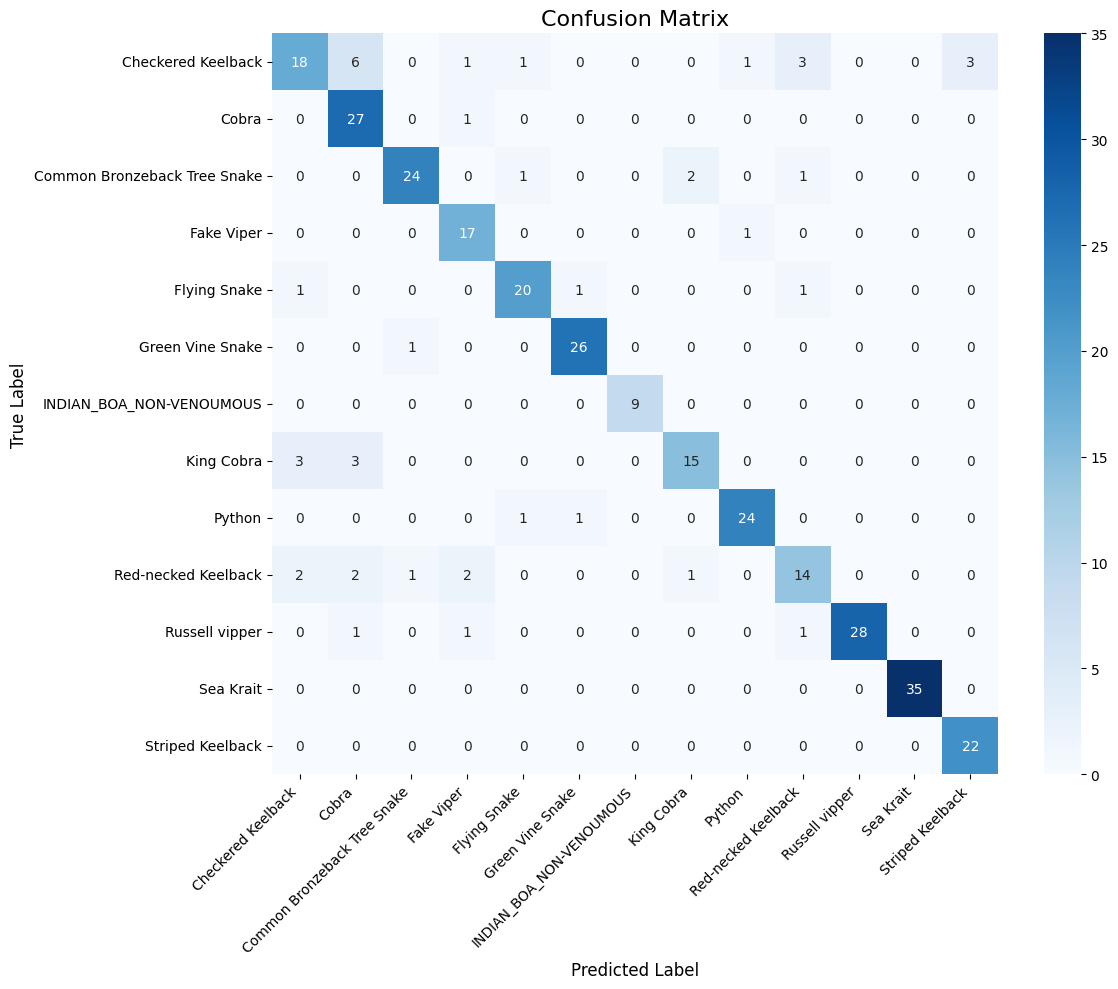

In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

# ==============================================================================
# 1. Get All Predictions from the Validation Set
# ==============================================================================

# Initialize lists to store predictions and true labels
y_pred = []
y_true = []

# Set the model to evaluation mode (CRITICAL)
model.eval()

# Disable gradient calculations to save memory and speed up
with torch.no_grad():
    # Loop over the validation data
    for inputs, labels in tqdm(val_loader, desc="Generating Predictions"):
        # Move data to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Get model outputs
        outputs = model(inputs)

        # Get the predicted class (the index with the highest probability)
        _, predicted = torch.max(outputs, 1)

        # Append the predictions and true labels to our lists
        # .cpu() is important to move the data back to the host computer for sklearn
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# ==============================================================================
# 2. Compute the Confusion Matrix
# ==============================================================================

# Get the list of class names from the dataset
class_names = train_dataset.classes

# Compute the confusion matrix using sklearn
cm = confusion_matrix(y_true, y_pred)

# ==============================================================================
# 3. Visualize the Confusion Matrix
# ==============================================================================

# Set up the plot
plt.figure(figsize=(12, 10))

# Create a heatmap using Seaborn
# annot=True displays the numbers in each cell
# fmt='d' formats the numbers as integers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

# Add titles and labels for clarity
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to make sure everything fits
plt.show()

In [ ]:
torch.save(model.state_dict(), 'resnet50_snake_classifier3.pth')

In [3]:
import torch
import torch.nn as nn
from torchvision import models
from PIL import Image
from torchvision import transforms

# ==============================================================================
# Essential Information Needed to Rebuild the Model
# ==============================================================================

# You MUST know the number of classes your model was trained on.
# You can get this from your saved class mapping or the training script.
NUM_CLASSES = 13 # Replace with your actual number of snake species

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


# ==============================================================================
# 1. Re-create the Model Architecture
# ==============================================================================

print("Creating the model architecture...")
# Create an instance of the ResNet50 model
# Note: We don't need the pre-trained weights here, but loading them is fine.
loaded_model = models.resnet50()

# Get the number of input features for the classifier
num_ftrs = loaded_model.fc.in_features

# Replace the final layer to match the architecture you saved
loaded_model.fc = nn.Linear(num_ftrs, NUM_CLASSES)

# Move the model structure to the correct device (CPU or GPU)
loaded_model.to(device)


# ==============================================================================
# 2. Load the Saved Weights (the State Dictionary)
# ==============================================================================

# Define the path to your saved .pth file
model_path = 'resnet50_snake_classifier3.pth' # Use the name of your saved file
print(f"Loading weights from: {model_path}")

# Load the state dictionary. The map_location ensures it works even if you
# trained on a GPU and are now loading on a CPU.
loaded_model.load_state_dict(torch.load(model_path, map_location=device))


# ==============================================================================
# 3. Set the Model to Evaluation Mode (CRITICAL STEP)
# ==============================================================================

loaded_model.eval()
print("Model set to evaluation mode.")


# ==============================================================================
# 4. Use the Loaded Model for Prediction
# ==============================================================================

# Assume you have your idx_to_class mapping and prediction function from before
# idx_to_class = {0: 'Flying Snake', 1: 'Indian Cobra', ...}
# def predict_pytorch(image_path, model, idx_to_class, device): ...

# Example of using the loaded model:
# test_image = 'path/to/a/new_snake_image.jpg'
# predicted_species, confidence = predict_pytorch(test_image, loaded_model, idx_to_class, device)

# print(f"\nPrediction Complete:")
# print(f"Predicted Species: {predicted_species}")
# print(f"Confidence: {confidence*100:.2f}%")

Using device: cuda
Creating the model architecture...
Loading weights from: resnet50_snake_classifier3.pth
Model set to evaluation mode.


In [12]:
class_to_idx = {
    'Checkered Keelback': 0,
    'Cobra': 1,
    'Common Bronzesback Tree Snake': 2,
    'Fake Viper': 3,
    'Flying Snake': 4,
    'Green Vine Snake': 5,
    'INDIAN_BOA_NON-VENOMOUS': 6,
    'King Cobra': 7,
    'Python': 8,
    'Red-necked Keelback': 9,
    'Russell Vipper': 10,
    'Sea Krait': 11,
    'Striped Keelback': 12
}

idx_to_class = {idx: cls for cls, idx in class_to_idx.items()}
NUM_CLASSES = len(idx_to_class)

print(f"Successfully loaded class mapping for {NUM_CLASSES} classes.")

Successfully loaded class mapping for 13 classes.


In [15]:
def predict_pytorch(image_path, model, idx_to_class, device):
    """
    Loads, preprocesses, and predicts the class for a single image.
    """
    # Define the same transformations as the validation set
    prediction_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    # Load and transform the image
    try:
        image = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        return "Error: Image file not found.", 0.0

    image_tensor = prediction_transforms(image).unsqueeze(0) # Add batch dimension

    # Move tensor to the correct device
    image_tensor = image_tensor.to(device)

    # Get prediction
    with torch.no_grad():
        outputs = model(image_tensor)
        # Convert logits to probabilities
        probabilities = torch.nn.functional.softmax(outputs, dim=1)

    # Decode the prediction
    confidence, predicted_idx = torch.max(probabilities, 1)
    predicted_class = idx_to_class[predicted_idx.item()]

    return predicted_class, confidence.item()


# ==============================================================================
# 4. Use the Function to Predict a New Image
# ==============================================================================

# --- IMPORTANT: CHANGE THIS PATH to an image you want to test ---
test_image_path = '/content/f2f8843ff6014aa49eb68fd60e4a7cc6.jpg'

# Call the prediction function
predicted_species, confidence = predict_pytorch(test_image_path, loaded_model, idx_to_class, device)

# Print the results
print(f"\n--- Prediction Result ---")
print(f"Image: {test_image_path}")
print(f"Predicted Species: {predicted_species}")
print(f"Confidence: {confidence * 100:.2f}%")


--- Prediction Result ---
Image: /content/f2f8843ff6014aa49eb68fd60e4a7cc6.jpg
Predicted Species: Green Vine Snake
Confidence: 99.91%
